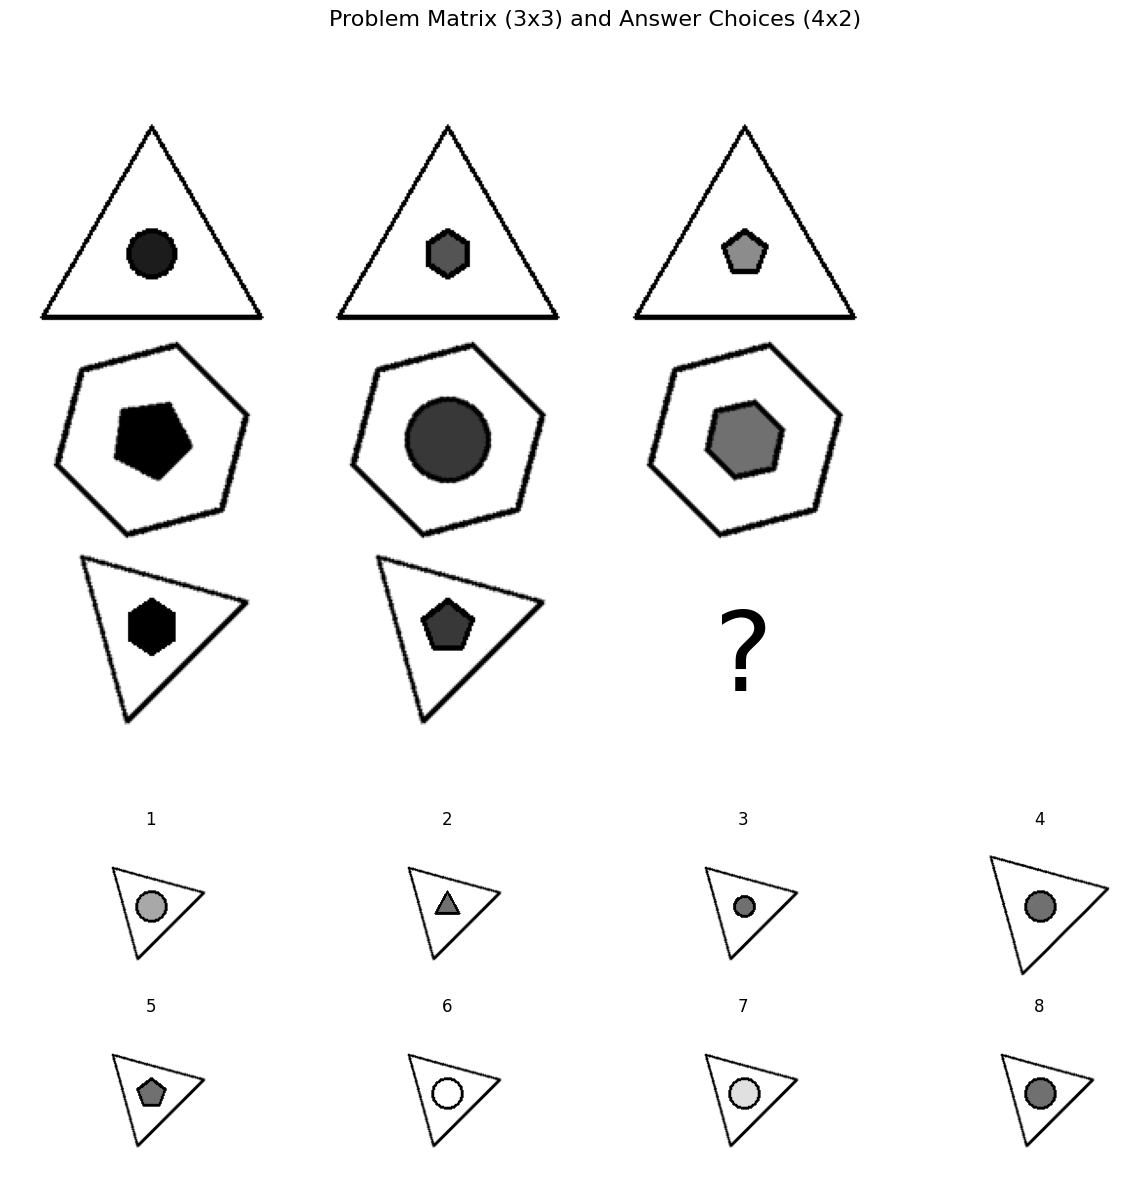

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the NPZ file
data = np.load('./RAVEN-10000/in_center_single_out_center_single/RAVEN_0_train.npz')

# Create a custom colormap with transparency for white
gray_with_transparency = plt.cm.gray(np.linspace(0, 1, 256))
gray_with_transparency[-1, -1] = 0  # Set alpha value of white color to 0 (fully transparent)
transparent_cmap = ListedColormap(gray_with_transparency)

# Create a new figure for visualization
fig = plt.figure(figsize=(12, 12))
images = data['image']  # Shape: (16, 160, 160) or fewer images
target = data['target']  # Index of the correct choice

# Plot the problem matrix (3x3 grid, last cell is a question mark)
for i in range(8):
    ax = plt.subplot2grid((6, 4), (i // 3, i % 3), rowspan=2, colspan=1)  # Larger space for the problem matrix
    ax.imshow(images[i], cmap=transparent_cmap)  # Use the transparent colormap
    ax.axis("off")

# Add the question mark in the last cell
ax = plt.subplot2grid((6, 4), (2, 2), rowspan=2, colspan=1)
ax.text(0.5, 0.4, "?", fontsize=80, ha="center", va="center")
ax.axis("off")

# Plot the answer choices (4x2 grid with numbers, label the correct answer)
for i in range(8):
    ax = plt.subplot2grid((6, 4), (4 + i // 4, i % 4), rowspan=1, colspan=1)  # Answer choices grid
    ax.imshow(images[8 + i], cmap=transparent_cmap)  # Use the transparent colormap
    choice_label = f"{i+1}"
    ax.set_title(choice_label, fontsize=12, pad=0, loc='center')
    ax.axis("off")

# Add a super-title
plt.suptitle("Problem Matrix (3x3) and Answer Choices (4x2)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.show()

In [3]:
data['structure']

array([b'Scene', b'Out_In', b'Out', b'Out_Center_Single', b'/', b'/',
       b'In', b'In_Center_Single', b'/', b'/', b'/', b'/'], dtype='|S17')